In [1]:
import gensim

In [6]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [4]:
corpus = ["Natural Language Processing is fascinating",
    "Word embeddings capture semantic relationships",
    "Deep learning helps NLP models understand text",
    "Machine learning and AI transform technology"]

In [7]:
tokenized_corpus = [simple_preprocess(sentence) for sentence in corpus]

In [8]:
model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=2, min_count=1,workers=4)

In [9]:
model.save("word2vec.model")

In [11]:
#Load model da huan luyen
model = Word2Vec.load("word2vec.model")

print(model.wv.most_similar("learning"))

[('machine', 0.27060529589653015), ('nlp', 0.21055805683135986), ('deep', 0.16704076528549194), ('helps', 0.15017232298851013), ('word', 0.13204392790794373), ('relationships', 0.1267007291316986), ('capture', 0.09988639503717422), ('ai', 0.07064922899007797), ('understand', 0.059367649257183075), ('text', 0.04979120194911957)]


In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [15]:
#lay cac vector tu
words = list(model.wv.key_to_index)
word_vectors = [model.wv[word] for word in words]

In [17]:
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

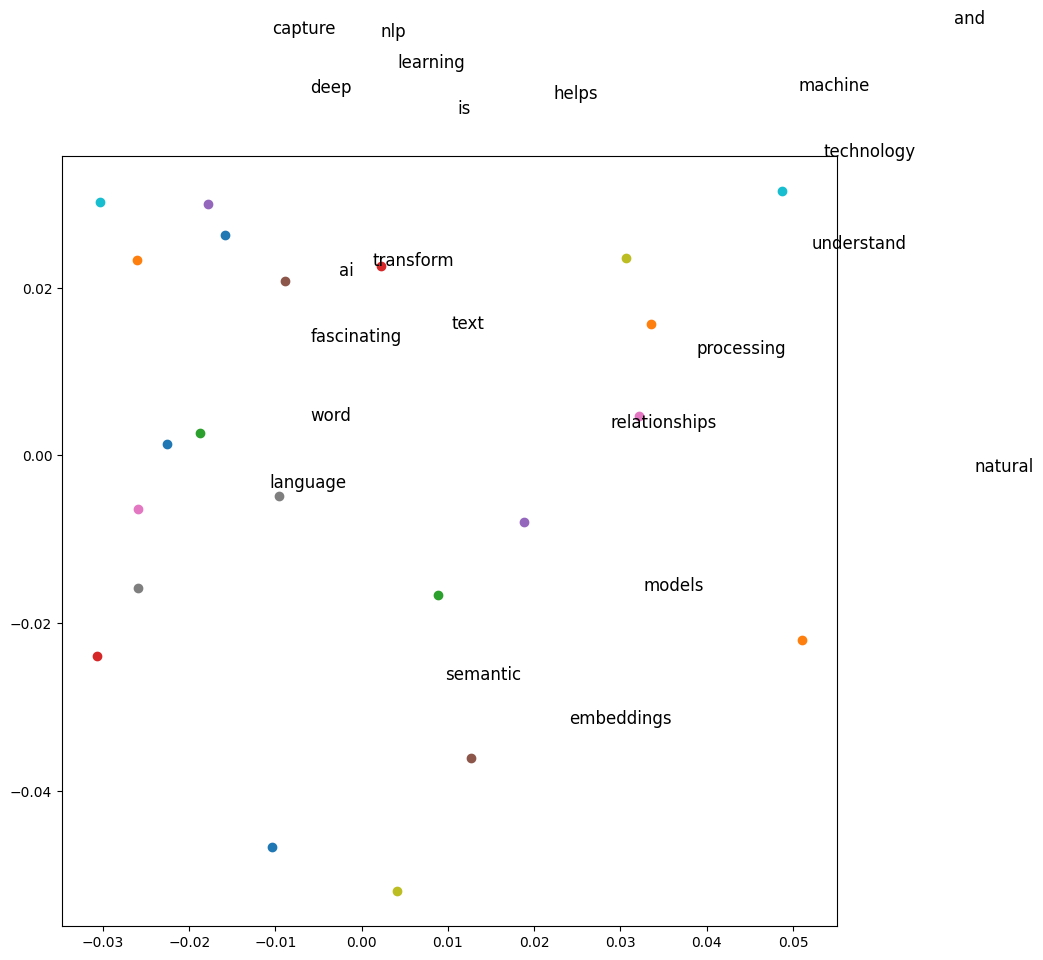

In [19]:
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    x, y = word_vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x+0.02, y+0.02, word, fontsize=12)
plt.show()